In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
import tensorflow.keras
!pip install tensorflow-io -q
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import numpy as np
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 12.3 MB/s eta 0:00:00


In [5]:
cap_path='/content/drive/MyDrive/Birds/Parsed_Capuchinbird_Clips'
non_cap_path='/content/drive/MyDrive/Birds/Parsed_Not_Capuchinbird_Clips'

In [7]:
len(os.listdir(cap_path))

217

In [8]:
len(os.listdir(non_cap_path))

593

In [11]:
sample1_path=os.path.join(cap_path,os.listdir(cap_path)[15])

In [12]:
sample1_path

'/content/drive/MyDrive/Birds/Parsed_Capuchinbird_Clips/XC16804-0.wav'

In [14]:
from IPython.display import Audio

In [15]:
Audio(sample1_path)

In [16]:
import librosa

In [18]:
sample1,sr1=librosa.load(sample1_path)

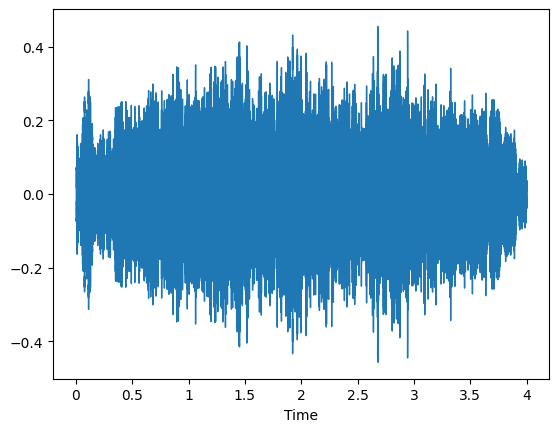

In [20]:
librosa.display.waveshow(sample1,sr=sr1)
plt.show()

In [23]:
S=librosa.feature.melspectrogram(y=sample1,sr=sr1)

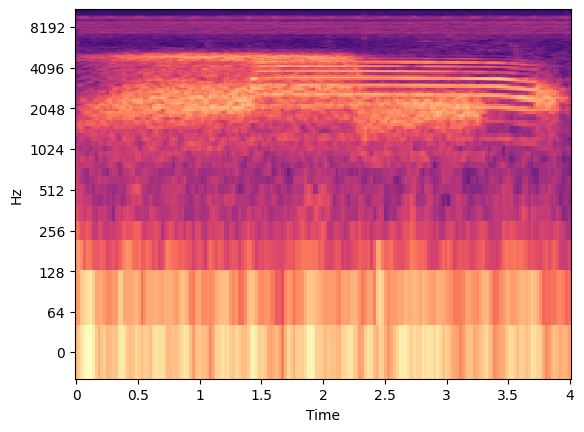

In [26]:
S_db=librosa.power_to_db(S,ref=np.max)
librosa.display.specshow(S_db,sr=sr1,x_axis='time',y_axis='log')
plt.show()

In [27]:
C=librosa.feature.chroma_stft(y=sample1,sr=sr1)

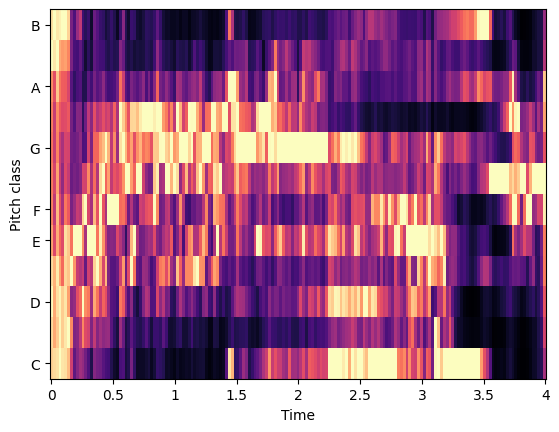

In [28]:
librosa.display.specshow(C,sr=sr1,x_axis='time',y_axis='chroma')
plt.show()

In [29]:
sample2_path=os.path.join(non_cap_path,os.listdir(non_cap_path)[15])

In [30]:
sample2,sr2=librosa.load(sample2_path)

In [32]:
Audio(sample2_path)

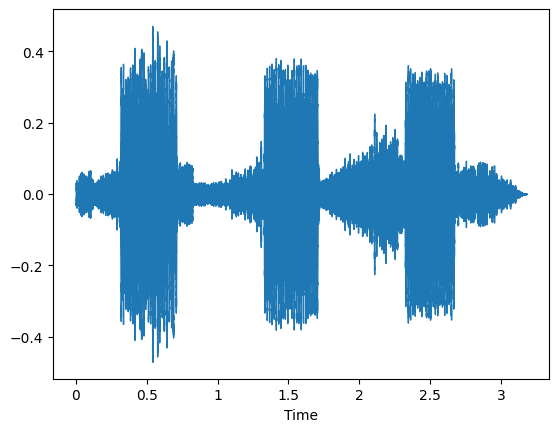

In [40]:
librosa.display.waveshow(y=sample2,sr=sr2)

In [33]:
S=librosa.feature.melspectrogram(y=sample2,sr=sr2)

In [35]:
S_db=librosa.power_to_db(S,ref=np.max)

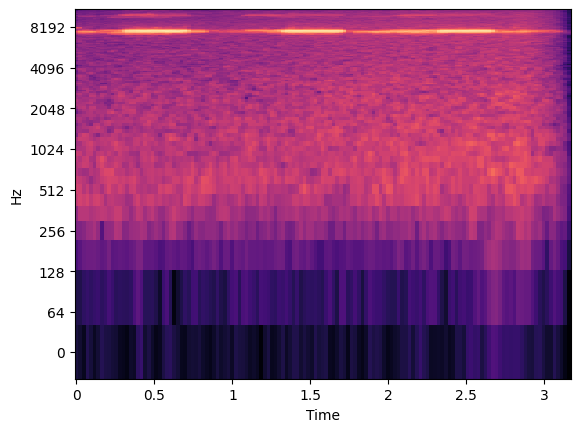

In [36]:
librosa.display.specshow(S_db,sr=sr2,x_axis='time',y_axis='log')

In [37]:
C=librosa.feature.chroma_stft(y=sample2,sr=sr2)

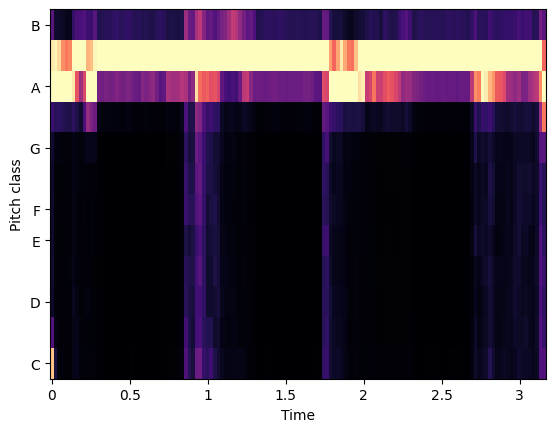

In [39]:
librosa.display.specshow(C,sr=sr2,x_axis='time',y_axis='chroma')

In [66]:
def print_mel(dir,n_samples=10):
  n=n_samples
  n_div=int(np.ceil(np.sqrt(n)))
  fig,axes=plt.subplots(n_div,n_div,figsize=(20,20))
  files=[]
  for i in range(n):
    r=np.random.randint(0,len(os.listdir(dir)))
    files.append(os.path.join(dir,os.listdir(dir)[r]))
  c=0
  for i in range(n_div):
    for j in range(n_div):
      if c==n:
        break
      y, sr=librosa.load(files[c])
      S=librosa.feature.melspectrogram(y=y,sr=sr)
      S_db=librosa.power_to_db(S,ref=np.max)
      librosa.display.specshow(S_db,sr=sr,x_axis='time',y_axis='log',ax=axes[i][j])
      plt.axis('off')
      c+=1
  plt.tight_layout()
  plt.show()

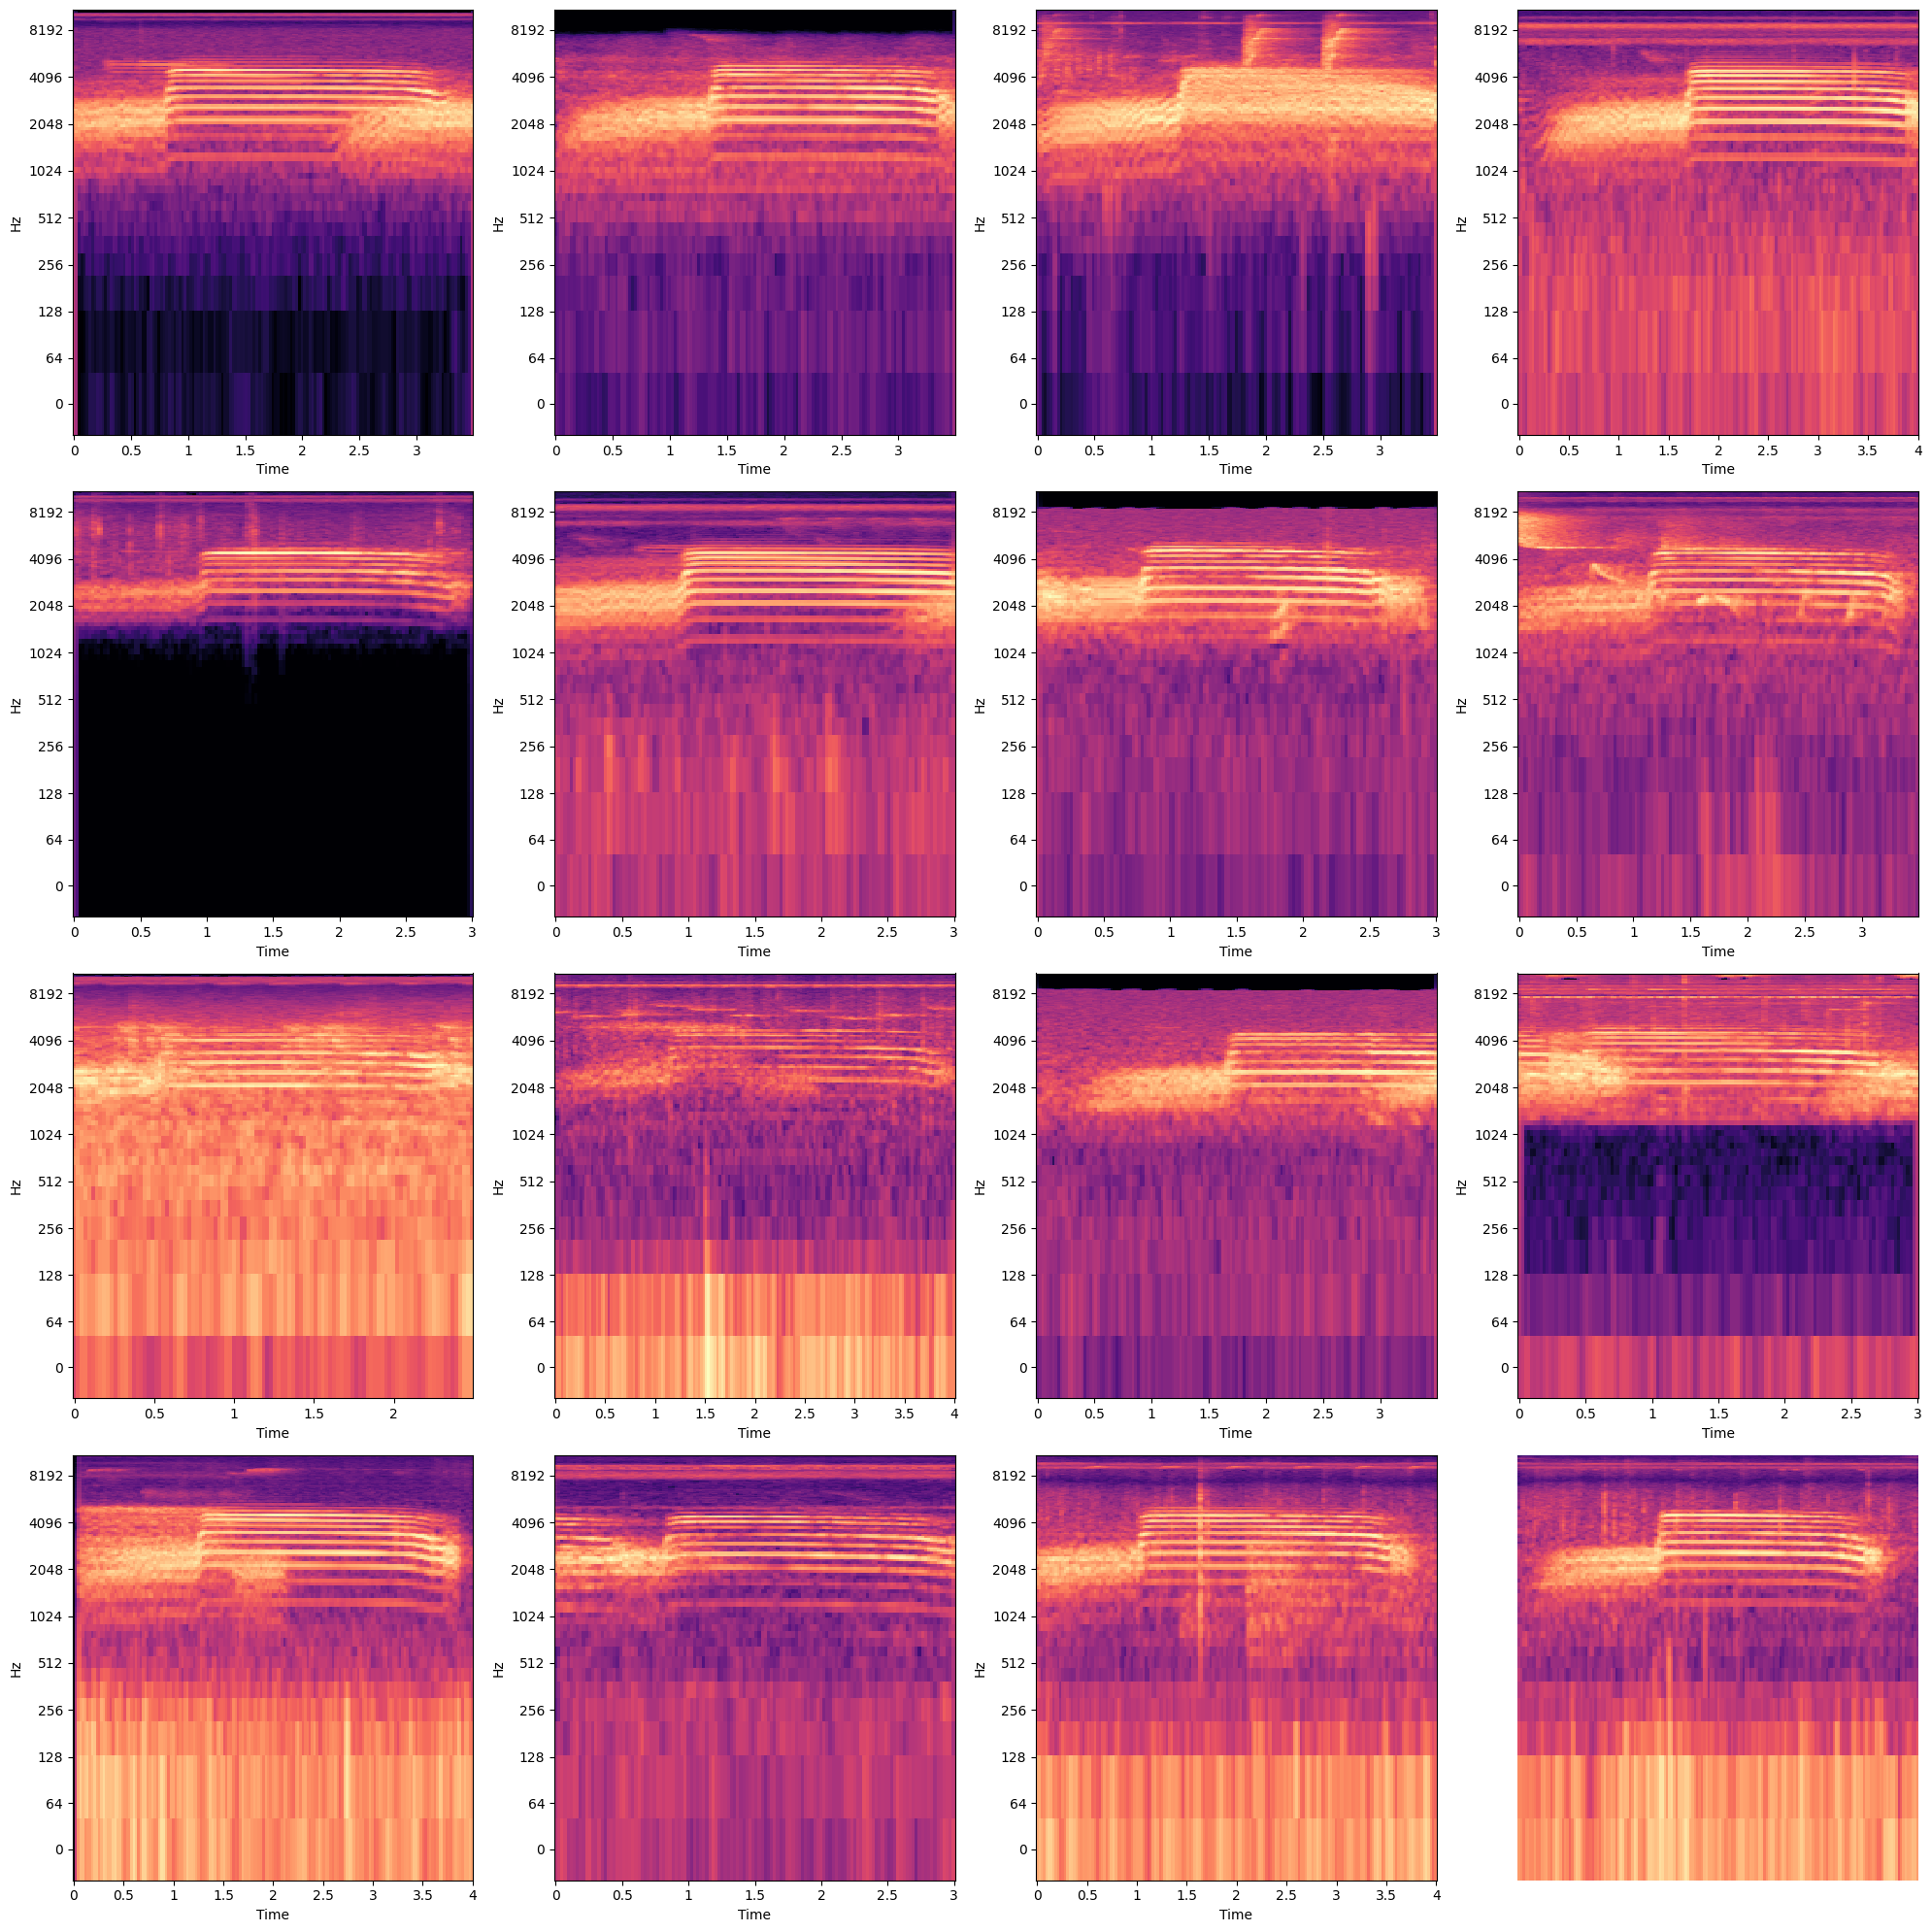

In [67]:
print_mel(cap_path,16)

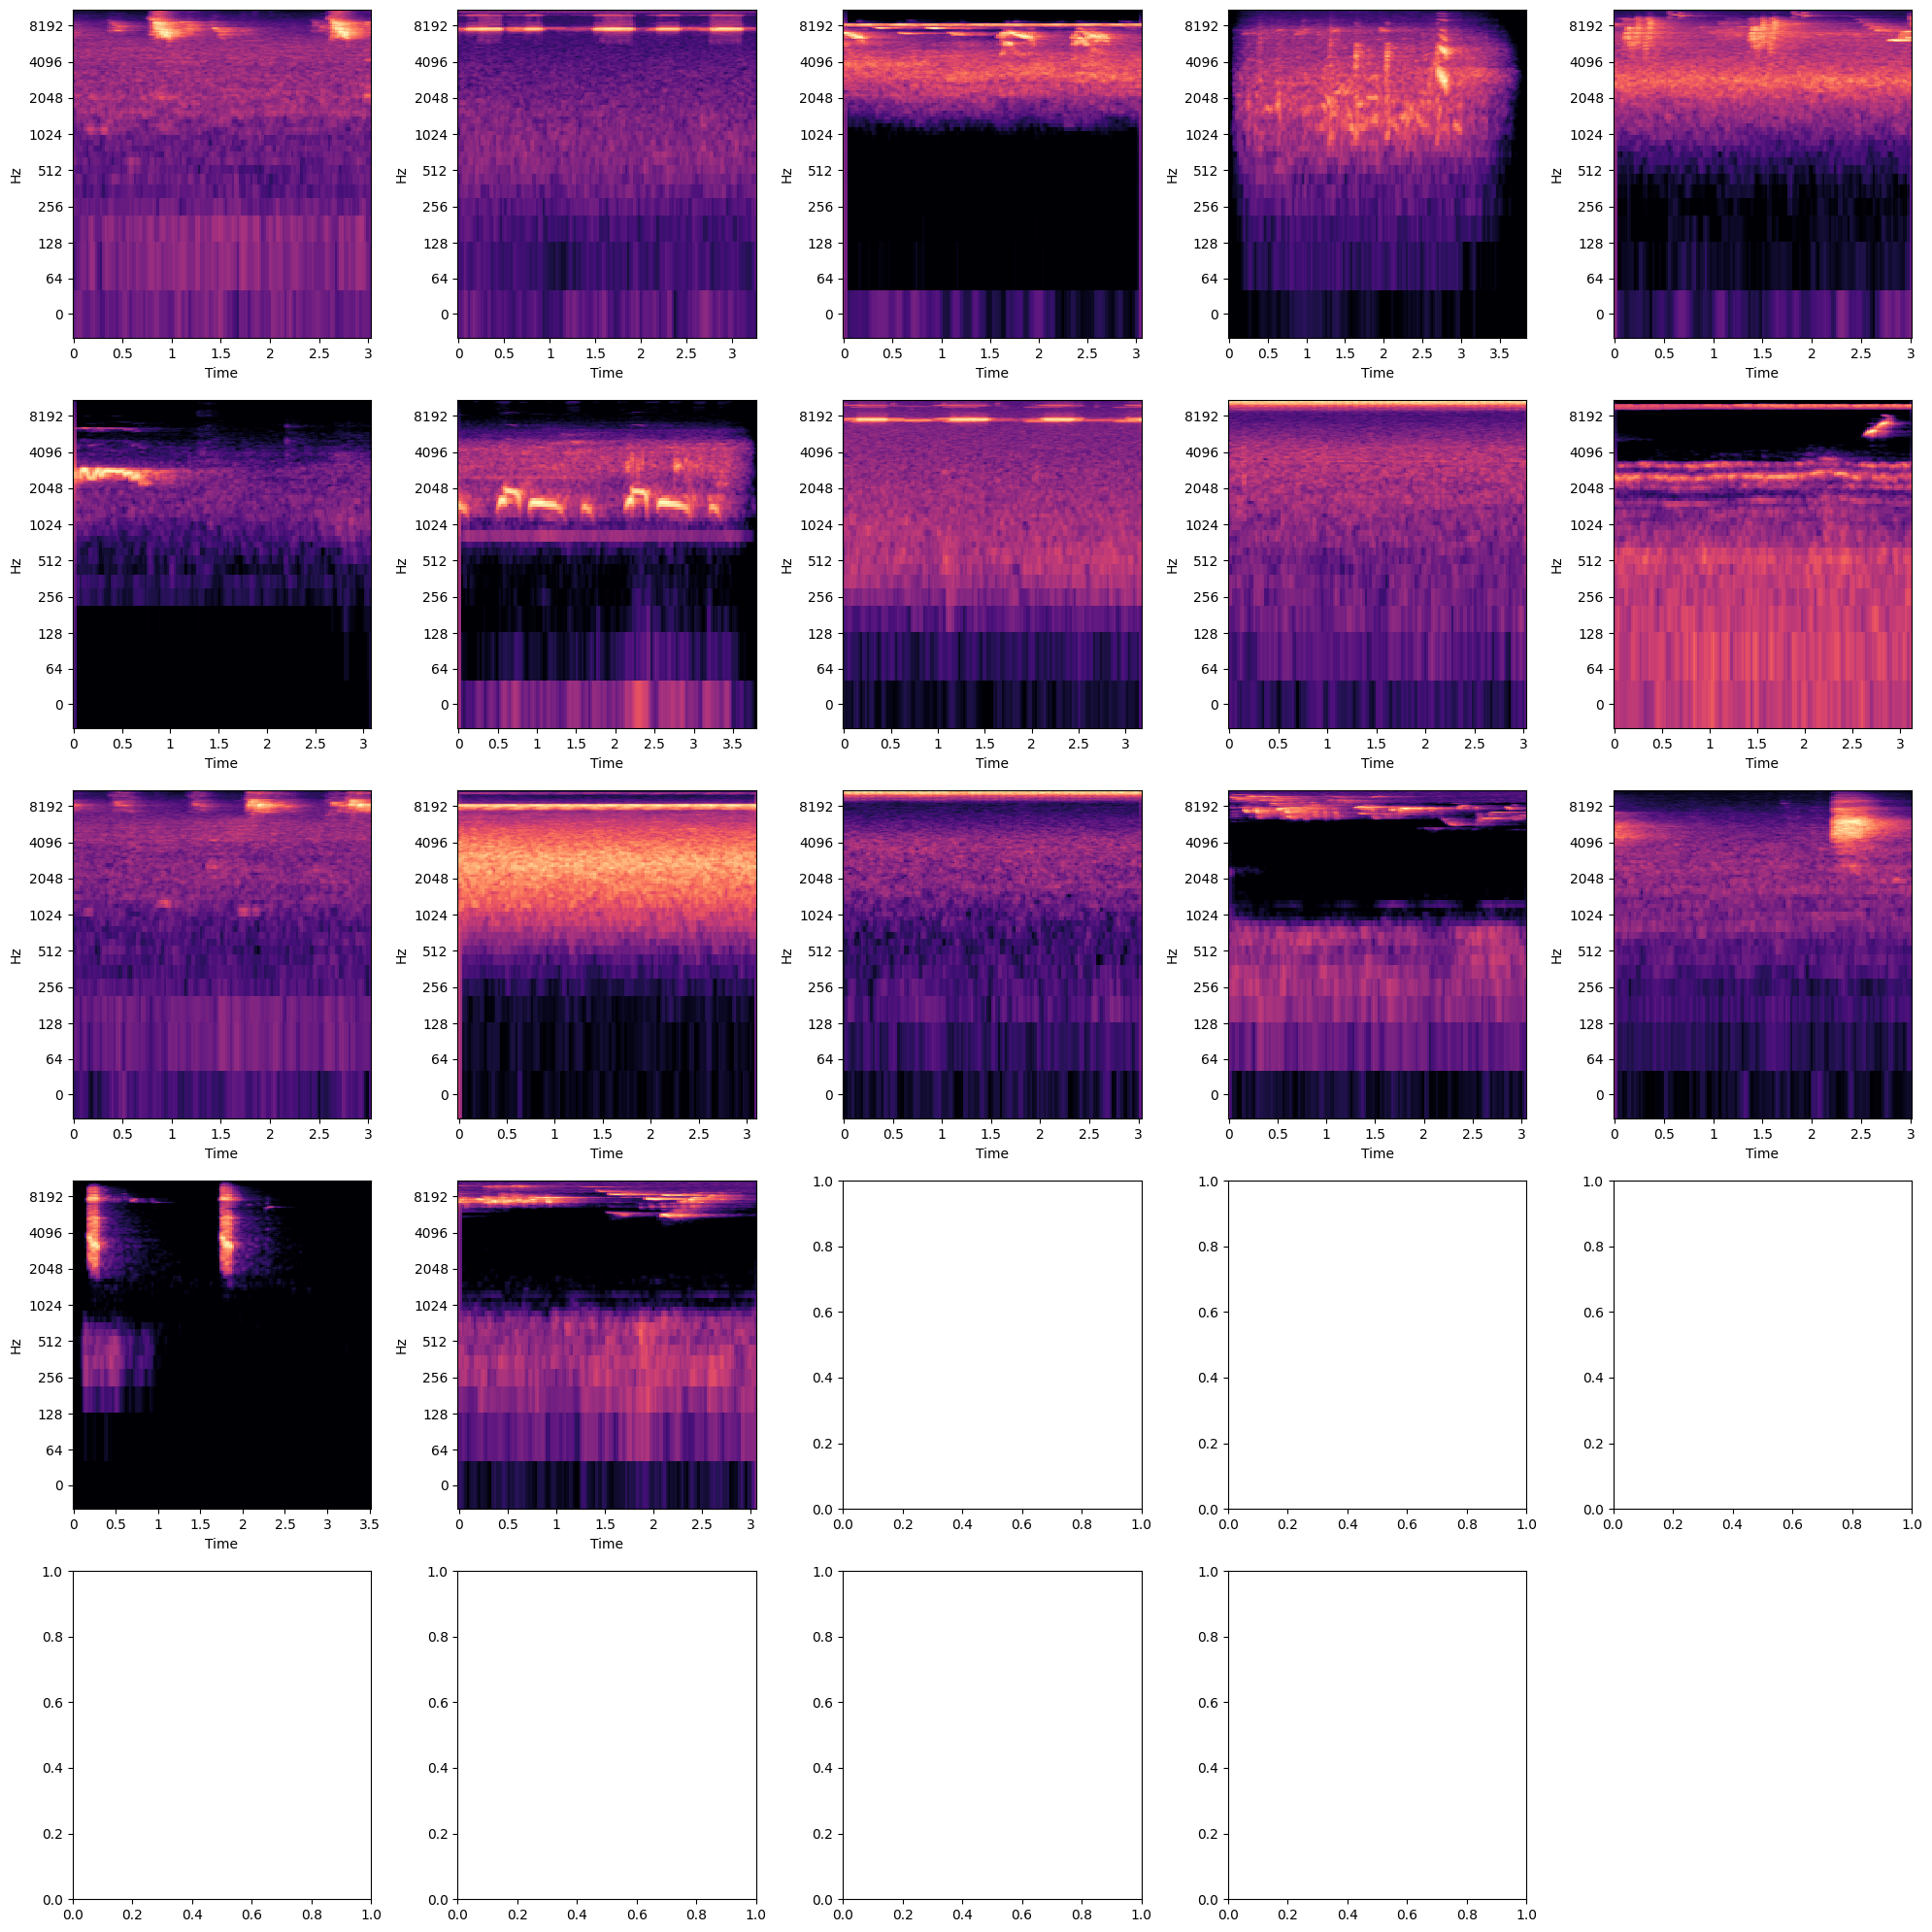

In [68]:
print_mel(non_cap_path,17)

In [69]:
def load_wav_files(file):
  data, sr=librosa.load(file,sr=16000,mono=True)
  return data

In [70]:
cap_path

'/content/drive/MyDrive/Birds/Parsed_Capuchinbird_Clips'

In [71]:
non_cap_path

'/content/drive/MyDrive/Birds/Parsed_Not_Capuchinbird_Clips'

In [73]:
import pandas as pd
df=pd.DataFrame(columns=['Path','Label'])

In [75]:
path=[]
label=[]
for file in os.listdir(cap_path):
  file_path=os.path.join(cap_path,file)
  path.append(file_path)
  label.append(1)

for file in os.listdir(non_cap_path):
  file_path=os.path.join(non_cap_path,file)
  path.append(file_path)
  label.append(0)

In [78]:
df['Path']=path
df['Label']=label

In [79]:
df.head()

,Path,Label
0,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1
1,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1
2,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1
3,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1
4,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1


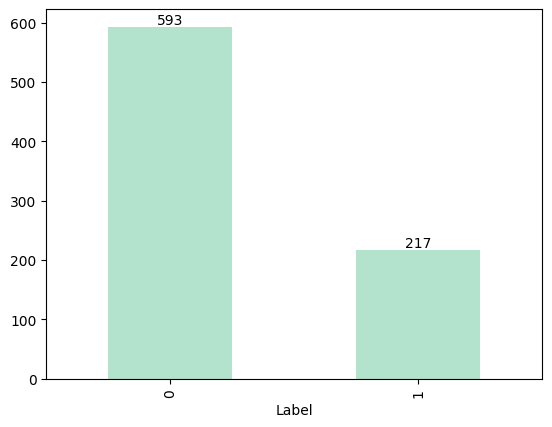

In [81]:
ax=df['Label'].value_counts().plot(kind='bar',cmap='Pastel2')
for bars in ax.containers:
  ax.bar_label(bars)

In [82]:
duration=[]
for path in df['Path']:
  y, sr=librosa.load(path)
  duration.append(librosa.get_duration(y=y,sr=sr))

In [83]:
df['Duration']=duration

In [84]:
df.head()

,Path,Label,Duration
0,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1,3.0
1,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1,2.5
2,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1,3.5
3,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1,3.0
4,/content/drive/MyDrive/Birds/Parsed_Capuchinbi...,1,4.0


In [89]:
df[df['Label']==1]['Duration'].mean()

3.3847919997492086

In [90]:
df[df['Label']==0]['Duration'].mean()

3.081104036893003

In [91]:
features=[]
for path in df['Path']:
  y, sr=librosa.load(path,sr=16000,mono=True)
  mfcc_features=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40)
  mfcc_scaled_features=np.mean(mfcc_features.T,axis=0)
  features.append(mfcc_scaled_features)


In [94]:
df['Features']=features

In [96]:
df['Features'][0]

array([-3.83909393e+02,  4.43851204e+01,  1.10709372e+01, -6.49516068e+01,
       -2.07990952e+01,  2.29148464e+01, -2.42234325e+01,  2.66908112e+01,
        9.96507347e-01,  2.51618748e+01,  2.56383991e+00, -6.38144970e+00,
       -1.04626656e+01,  1.27633276e+01, -1.13249788e+01,  2.16925240e+01,
       -1.61672363e+01,  1.52453785e+01, -3.45816422e+00,  1.58376274e+01,
       -2.21566153e+00, -7.07208300e+00, -6.82741022e+00,  5.85391045e+00,
        1.21238410e+00,  8.33956301e-01, -8.26100922e+00, -2.39967656e+00,
       -1.70317852e+00, -2.59428239e+00, -3.53615910e-01,  5.91403198e+00,
        7.62813866e-01, -1.86453688e+00, -4.53782749e+00,  1.59025252e+00,
       -5.36129177e-01, -4.47557354e+00, -3.65634888e-01,  2.06218290e+00],
      dtype=float32)

In [98]:
final_df=df[['Features','Label']]

In [99]:
final_df

,Features,Label
0,"[-383.9094, 44.38512, 11.070937, -64.95161, -2...",1
1,"[-374.61777, 54.244053, 11.444738, -67.103035,...",1
2,"[-388.305, 45.294945, 16.562407, -56.525494, -...",1
3,"[-387.46014, 36.237198, 6.400551, -51.15094, -...",1
4,"[-399.91888, 44.318382, 4.8987412, -46.47569, ...",1
...,...,...
805,"[-374.2452, 105.06364, -17.382668, -54.27657, ...",0
806,"[-404.81604, 62.338776, -11.980611, -37.294476...",0
807,"[-403.44226, 88.36304, -10.273873, -53.103943,...",0
808,"[-388.17612, 92.61251, -11.188163, -51.196625,...",0


In [116]:
X=final_df['Features'].tolist()
X=np.array(X)
print(X.shape)

y=final_df['Label'].tolist()
y=np.array(y)
print(y.shape)

(810, 40)
(810,)


In [100]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [120]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(40,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [121]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5248      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [122]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [118]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(648, 40)
(162, 40)
(648,)
(162,)


In [108]:
es=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True,verbose=1)
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=10,varbose=1)
file='/content/drive/MyDrive/Birds/model.h5'
mc=ModelCheckpoint(file,verbose=1,save_best_only=True)
cb=[es,lr,mc]

In [123]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=cb)

Epoch 1/100
17/21 [=======================>......] - ETA: 0s - loss: 2.2611 - accuracy: 0.7794
Epoch 1: val_loss improved from inf to 0.31160, saving model to /content/drive/MyDrive/Birds/model.h5
21/21 [==============================] - 2s 31ms/step - loss: 2.2229 - accuracy: 0.7901 - val_loss: 0.3116 - val_accuracy: 0.9074 - lr: 0.0010
Epoch 2/100
 9/21 [===========>..................] - ETA: 0s - loss: 1.4060 - accuracy: 0.8299

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/21 [=====================>........] - ETA: 0s - loss: 1.4141 - accuracy: 0.8438
Epoch 2: val_loss did not improve from 0.31160
21/21 [==============================] - 0s 10ms/step - loss: 1.2380 - accuracy: 0.8596 - val_loss: 0.7476 - val_accuracy: 0.9198 - lr: 0.0010
Epoch 3/100
17/21 [=======================>......] - ETA: 0s - loss: 0.7034 - accuracy: 0.9044
Epoch 3: val_loss improved from 0.31160 to 0.05263, saving model to /content/drive/MyDrive/Birds/model.h5
21/21 [==============================] - 0s 13ms/step - loss: 0.7356 - accuracy: 0.9059 - val_loss: 0.0526 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 4/100
17/21 [=======================>......] - ETA: 0s - loss: 0.4961 - accuracy: 0.9118
Epoch 4: val_loss improved from 0.05263 to 0.03726, saving model to /content/drive/MyDrive/Birds/model.h5
21/21 [==============================] - 0s 14ms/step - loss: 0.5453 - accuracy: 0.9120 - val_loss: 0.0373 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 5/100
20/21 [====================

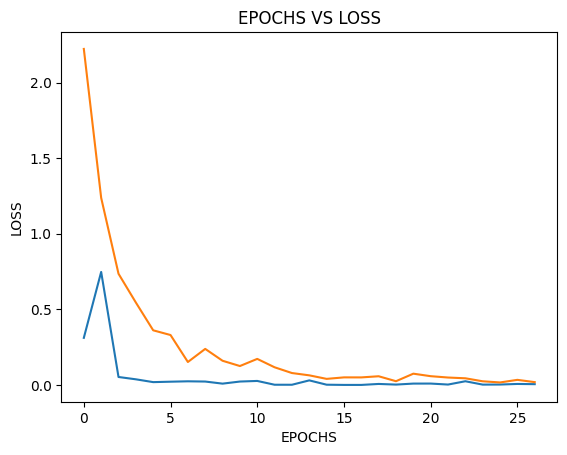

In [124]:
plt.plot(history.history['val_loss'],label='validation')
plt.plot(history.history['loss'],label='training')
plt.title('EPOCHS VS LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

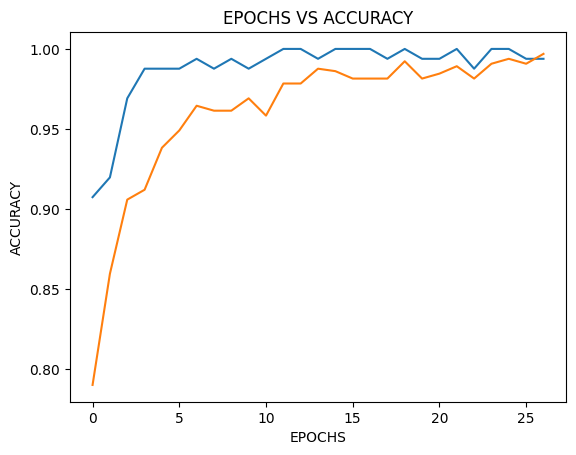

In [126]:
plt.plot(history.history['val_accuracy'],label='validation')
plt.plot(history.history['accuracy'],label='training')
plt.title('EPOCHS VS ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

In [129]:
test1,sr1=librosa.load(os.path.join(cap_path,os.listdir(cap_path)[8]),sr=16000)
test2,sr2=librosa.load(os.path.join(non_cap_path,os.listdir(non_cap_path)[12]),sr=16000)

In [133]:
mfcc_1=librosa.feature.mfcc(y=test1,sr=sr1,n_mfcc=40)
mfcc_features=np.mean(mfcc_1.T,axis=0)

In [134]:
mfcc_2=librosa.feature.mfcc(y=test2,sr=sr2,n_mfcc=40)
mfcc_features_2=np.mean(mfcc_2.T,axis=0)

In [138]:
mfcc_features=np.expand_dims(mfcc_features,axis=0)
mfcc_features.shape

(1, 40)

In [139]:
mfcc_features_2=np.expand_dims(mfcc_features_2,axis=0)
mfcc_features_2.shape

(1, 40)

In [140]:
model.predict(mfcc_features)

1/1 [==============================] - 0s 93ms/step


array([[0.99999326]], dtype=float32)

In [141]:
model.predict(mfcc_features_2)

1/1 [==============================] - 0s 71ms/step


array([[8.905388e-16]], dtype=float32)